In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [44]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Data Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [46]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<AxesSubplot:>

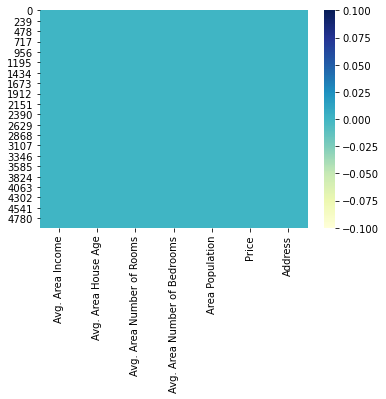

In [47]:
sns.heatmap(df.isnull(),cmap='YlGnBu')

In [48]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

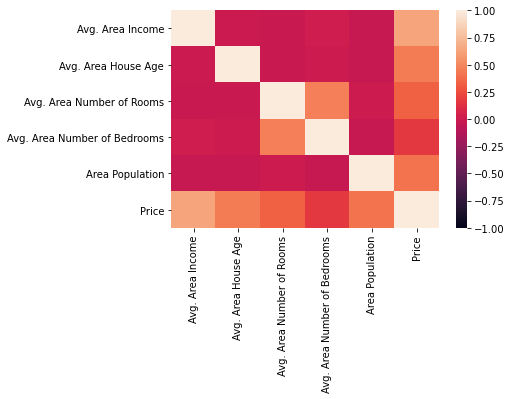

In [49]:
corr = df.corr()
sns.heatmap(corr,vmin=-1)

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Avg. Area Number of Rooms'>

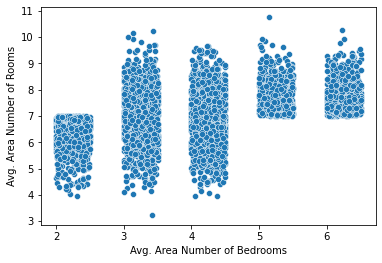

In [50]:
sns.scatterplot(data=df,x='Avg. Area Number of Bedrooms',y='Avg. Area Number of Rooms')

# Data Pre-processing

In [51]:
df = df.drop(['Address'],axis=1)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Holdout Method

In [52]:
X = df.loc[:,['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Avg. Area Number of Bedrooms','Area Population']]
y = df.loc[:,['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Avg. Area Number of Bedrooms,Area Population
2216,75774.718500,6.776730,7.633609,6.32,6.32,44508.603059
1973,68163.115240,7.230202,7.626444,6.17,6.17,36546.080118
3692,68907.005731,5.257784,6.583978,4.07,4.07,39014.444408
914,72000.917928,7.166548,7.869974,3.13,3.13,27699.048971
4771,64969.630576,5.669668,6.074015,3.40,3.40,35237.453429
...,...,...,...,...,...,...
4783,83882.085450,6.543978,7.718658,3.09,3.09,25838.855906
588,68858.031616,5.527127,6.282827,3.21,3.21,28846.950523
2872,78556.797054,6.162173,5.783254,3.16,3.16,34677.724299
212,79471.238817,5.867270,8.197289,6.21,6.21,36616.168834


# Standard Scaler

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Traning without Cross Validation

In [54]:
reg = LinearRegression()
reg.fit(X_train,y_train)
score = reg.score(X_train,y_train)
y_pred = reg.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score',r2_score(y_test, y_pred))

Mean Squared Error: 9924545788.847763
r2 score 0.9180888677638886


# Training with Cross Validation

In [55]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring = 'r2')
predicted = cross_val_predict(reg, X_test, y_test, cv=5)
print('Mean Squared Error:', mean_squared_error(y_test, predicted))
print('r2 score:',max(scores))

Mean Squared Error: 10028398170.349493
r2 score: 0.9248760666548833


# Plotting Results

In [56]:
X_area = df.loc[:,['Avg. Area Income']]
X_area.shape

(5000, 1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_area, y, test_size=0.20)

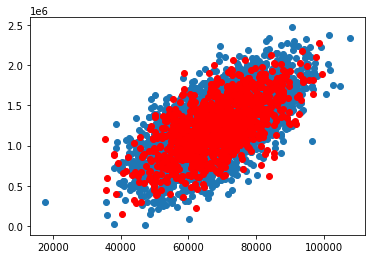

In [58]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test,color='red')

In [59]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

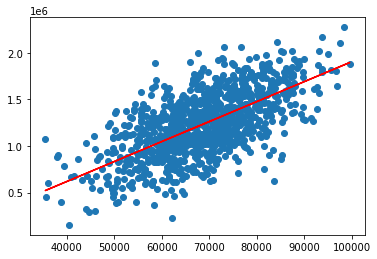

In [60]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')

In [61]:
X_age = df.loc[:,['Avg. Area House Age']]
X_age

,Avg. Area House Age
0,5.682861
1,6.002900
2,5.865890
3,7.188236
4,5.040555
...,...
4995,7.830362
4996,6.999135
4997,7.250591
4998,5.534388


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.20)

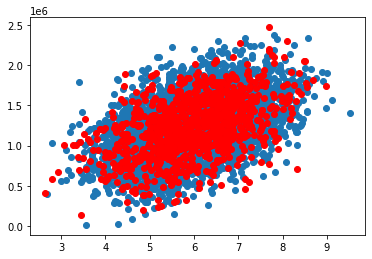

In [63]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test,color='red')

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

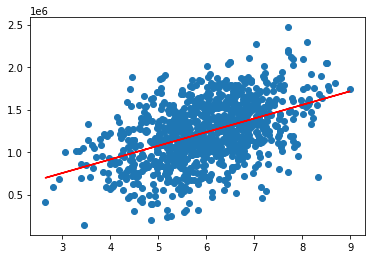

In [65]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')